In [75]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import numpy as np

In [ ]:
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [86]:
df_path = r"E:\MIT Dropbox\Greggory Heller\GRC_poster\all_somas_all_spine_dataframe.csv"
df = pd.read_csv(df_path)
df = df.loc[df['spine_responsive_status'] == 1]
print(df.columns)

Index(['Unnamed: 0', 'fov_id', 'parent_soma_id',
       'parent_soma_responsive_status', 'parent_soma_preferred_orientation',
       'parent_soma_preferred_direction', 'spine_responsive_status',
       'spine_apical_status', 'spine_size', 'spine_distance_from_soma',
       'spine_preferred_orientation', 'spine_preferred_direction', 'spine_dsi',
       'physical_direction_to_soma', 'xy_distance_to_soma',
       'spine_resp_at_soma_preffered_direction',
       'spine_resp_at_soma_preffered_direction+-22.5',
       'spine_resp_at_soma_preffered_direction+-45',
       'spine_resp_at_soma_preffered_direction+-90'],
      dtype='object')


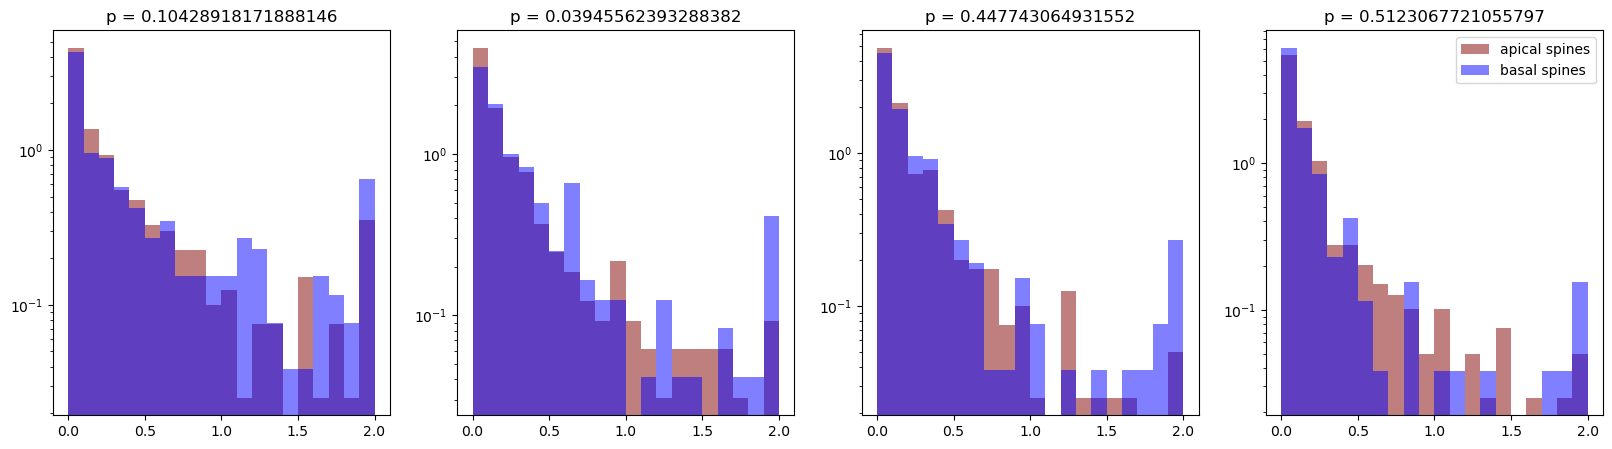

In [87]:
four_directions = ['spine_resp_at_soma_preffered_direction',    
                   'spine_resp_at_soma_preffered_direction+-22.5',
                   'spine_resp_at_soma_preffered_direction+-45',
                   'spine_resp_at_soma_preffered_direction+-90']

subset_dict = {}
subset_dict['apical spines'] = df['spine_apical_status']
subset_dict['basal spines'] = ~df['spine_apical_status']

fig, axs = plt.subplots(1,4, figsize = (20,5))

color_list = ['maroon', 'blue']
for i, direction in enumerate(four_directions):
    all_spine_responses = df[direction]
    responese_list = []
    for j, (key, subset) in enumerate(subset_dict.items()):
        these_spine_resposnes = all_spine_responses[subset]
        responese_list.append(these_spine_resposnes)
        these_spine_resposnes[these_spine_resposnes>2]=2
        heights, bints, patches = axs[i].hist(these_spine_resposnes, log=True, density=True, color=color_list[j], bins=20, alpha=.5, label=key)
    d, p = stats.ks_2samp(responese_list[0], responese_list[1])
    axs[i].set_title(f'p = {p}')
        
plt.legend()

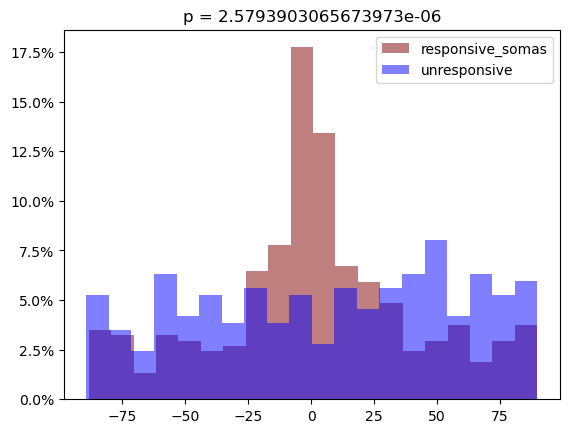

In [88]:


spine_offsets = df['spine_preferred_orientation'] - df['parent_soma_preferred_orientation']
#this should be between -90 and 90 - a rotation of 180 should map to 0, a rotation of 135 is the same as -45... how do we apply this transformation. its  
spine_offsets[spine_offsets>90] = -180 + spine_offsets[spine_offsets>90]
spine_offsets[spine_offsets<-90] = 180 + spine_offsets[spine_offsets<-90]

#plt.hist(spine_offsets)

subset_dict = {}
subset_dict['responsive_somas'] = df['parent_soma_responsive_status']
subset_dict['unresponsive'] = ~df['parent_soma_responsive_status']

fig, ax = plt.subplots()
overlapping_histogram(subset_dict, spine_offsets, ax=ax, hist_upper_bound = None)